In [56]:
import os
import sys

# Data manipulation and visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import python scripts we created to help with feature engineering
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.identify_missing_data import identify_missing_data
from src.helpers import identify_highly_correlated_features, one_hot, identify_low_variance_features
from src.learning_curve_plot import learning_curve_plot
from src.feature_importance_plot import feature_importance_plot


### Read and Explore the Data

In [2]:
# read the data

heart_attack_df = pd.read_csv('../data/heart_attack_data.csv')

# preview the data

heart_attack_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [3]:
# check the shape of the data

heart_attack_df.shape

# we have 294 rows of data, and 14 potential features.

(294, 14)

In [4]:
# check the summary information of the data
# do we have any categorical data that needs processing?

heart_attack_df.info()

# there is no categorical data, so we do not need to encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [5]:
# identifying missing data

missing_value_df = identify_missing_data(heart_attack_df)

print("# of features with missing data:", missing_value_df[missing_value_df.percent_missing > 0].shape[0])

# of features with missing data: 9


In [6]:
# features that have missing data

missing_value_df[missing_value_df.percent_missing > 0]

,feature,percent_missing,data_type
0,ca,98.98,float64
1,thal,90.48,float64
2,slope,64.63,float64
3,chol,7.82,float64
4,fbs,2.72,float64
5,trestbps,0.34,float64
6,restecg,0.34,float64
7,thalach,0.34,float64
8,exang,0.34,float64


In [7]:
print("# of features with missing data with more than 45% missing data:", missing_value_df[missing_value_df.percent_missing > 45].shape[0])

# of features with missing data with more than 45% missing data: 3


In [8]:
# features that have more than 45% missing data

missing_value_df[missing_value_df.percent_missing > 45]

,feature,percent_missing,data_type
0,ca,98.98,float64
1,thal,90.48,float64
2,slope,64.63,float64


In [9]:
# identifying correlations in data

corr = heart_attack_df.corr()
corr.style.background_gradient(cmap='coolwarm')

# we can see that ca is erroring because it is nearly missing 100% missing data
# negative correlation of -0,45 between thalach and thal, exang and cp have a positive correlation of 0.45
# exang and oldpeak have the highest correlation with the target.

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.013618,0.145826,0.245203,0.090979,0.182212,0.051989,-0.459420,0.238925,0.177707,-0.068000,nan,0.274092,0.159315
sex,0.013618,1.000000,0.249875,0.089112,0.028797,0.042798,-0.104614,-0.111781,0.154925,0.118931,0.213921,nan,-0.130013,0.272781
cp,0.145826,0.249875,1.000000,0.085631,0.138847,0.033346,-0.018154,-0.370440,0.494674,0.353109,0.392841,nan,-0.048622,0.505864
trestbps,0.245203,0.089112,0.085631,1.000000,0.084264,0.095416,0.013914,-0.184961,0.213856,0.206848,0.035536,nan,0.206153,0.139717
chol,0.090979,0.028797,0.138847,0.084264,1.000000,0.122902,0.050249,-0.127676,0.168518,0.109343,0.117838,nan,-0.113407,0.209318
fbs,0.182212,0.042798,0.033346,0.095416,0.122902,1.000000,0.049160,-0.071489,0.116170,0.062316,0.201315,nan,0.164353,0.163232
restecg,0.051989,-0.104614,-0.018154,0.013914,0.050249,0.049160,1.000000,0.004481,0.045392,0.042193,-0.031222,nan,-0.188991,-0.029937
thalach,-0.459420,-0.111781,-0.370440,-0.184961,-0.127676,-0.071489,0.004481,1.000000,-0.401980,-0.303028,-0.175356,nan,-0.456133,-0.331393
exang,0.238925,0.154925,0.494674,0.213856,0.168518,0.116170,0.045392,-0.401980,1.000000,0.632108,0.418895,nan,0.181142,0.583847
oldpeak,0.177707,0.118931,0.353109,0.206848,0.109343,0.062316,0.042193,-0.303028,0.632108,1.000000,0.121817,nan,0.116806,0.545700


In [10]:
# can also use the definition to identify patterns to look for correlations between features
identify_highly_correlated_features(heart_attack_df, correlation_threshold=0.3)

# i missed the relationship between exange and oldpeak when looking at the plot

,corr_feature,drop_feature,corrrelation_values
10,exang,oldpeak,0.63
12,exang,target,0.58
13,oldpeak,target,0.55
14,slope,target,0.54
15,thal,target,0.53
5,cp,target,0.51
2,cp,exang,0.49
0,age,thalach,0.46
8,thalach,thal,0.46
11,exang,slope,0.42


In [11]:
# identifying features with low variance

heart_attack_df.std()

# ca has no low variance, which we know since everything is missing. Can not see any features with low variance.

age          7.811812
sex          0.447533
cp           0.965117
trestbps    17.626568
chol        67.657711
fbs          0.255476
restecg      0.460868
thalach     23.589749
exang        0.460665
oldpeak      0.908648
slope        0.338995
ca           0.000000
thal         1.615074
target       0.480977
dtype: float64

In [12]:
# identify features with low variance

identify_low_variance_features(heart_attack_df, std_threshold=0.1)

number of low variance features: 1
low variance features: ['ca']


['ca']

In [13]:
# check the distribution of the target

heart_attack_df.target.value_counts(dropna = True, normalize = True)

# The data is slightly imbalanced, with only 36% of patients with known heartattacks
# Since the target is 1 and 0, we need to use classification algorithms to make predictions.

0    0.639456
1    0.360544
Name: target, dtype: float64

In [14]:
heart_attack_df.target.value_counts(normalize = True)

0    0.639456
1    0.360544
Name: target, dtype: float64

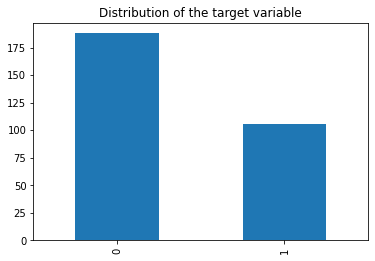

In [15]:
# visualise the distribution of the target

heart_attack_df.target.value_counts(dropna = True).plot(kind = 'bar')
plt.title("Distribution of the target variable");

# question: does the distribution look equal to you? 
# example of an imbalanced dataset

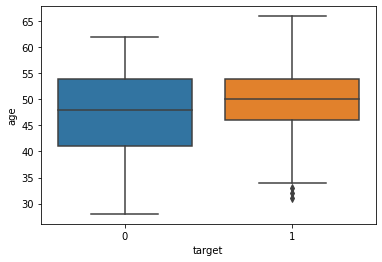

In [16]:
# I am interested in looking at patterns between age and the target.
# My assumption is that older people have had more heart attacks, even though this has a low correlation.

sns.boxplot(x=heart_attack_df.target, y=heart_attack_df.age);

# The boxplots show that patients with heart attacks have a higher age range, than patients that have not.
# Younger patients are considered outliers amongst patients with heart attacks. That's interesting!

## Cleaning the Data

In [17]:
# identify duplicates in data

heart_attack_df[heart_attack_df.duplicated(keep=False)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,49,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
102,49,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0


In [18]:
print(heart_attack_df.shape)

heart_attack_df_cleaned = heart_attack_df[~heart_attack_df.duplicated(keep='first')]

print(heart_attack_df_cleaned.shape)

(294, 14)
(293, 14)


## Feature Engineering

In [19]:
# drop features which have more than 45% missing values

threshold = 45

missing_value_df = identify_missing_data(heart_attack_df_cleaned)
missing_value_df

cols_to_drop = list(missing_value_df[missing_value_df.percent_missing > threshold].feature)
print("number of columns to drop:", len(cols_to_drop))
print(cols_to_drop)

number of columns to drop: 3
['ca', 'thal', 'slope']


In [20]:
# drop the features

heart_attack_df_cleaned.drop(cols_to_drop, axis = 1, inplace = True)

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
# check the columns were dropped

missing_value_df = identify_missing_data(heart_attack_df_cleaned)
missing_value_df

,feature,percent_missing,data_type
0,chol,7.51,float64
1,fbs,2.73,float64
2,trestbps,0.34,float64
3,restecg,0.34,float64
4,thalach,0.34,float64
5,exang,0.34,float64
6,age,0.00,int64
7,sex,0.00,int64
8,cp,0.00,int64
9,oldpeak,0.00,float64


In [22]:
# fill the remaining features with missing values with 0

heart_attack_df_cleaned.chol.fillna(0, inplace = True)
heart_attack_df_cleaned.fbs.fillna(0, inplace = True)
heart_attack_df_cleaned.trestbps.fillna(0, inplace = True)
heart_attack_df_cleaned.restecg.fillna(0, inplace = True)
heart_attack_df_cleaned.exang.fillna(0, inplace = True)
heart_attack_df_cleaned.thalach.fillna(0, inplace = True)


/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
missing_value_df = identify_missing_data(heart_attack_df_cleaned)
missing_value_df

,feature,percent_missing,data_type
0,age,0.0,int64
1,sex,0.0,int64
2,cp,0.0,int64
3,trestbps,0.0,float64
4,chol,0.0,float64
5,fbs,0.0,float64
6,restecg,0.0,float64
7,thalach,0.0,float64
8,exang,0.0,float64
9,oldpeak,0.0,float64


In [24]:
# Since we have no categorical data we do not have to do any encoding

In [25]:
# Since we have no highly correlated features, we do not need to drop any features

In [26]:
# Since we have no additional features with low variance (we already dropped ca), we do not need to drop any features

In [59]:
# our final dataframe, that we will use to build the heart attack prediction model contains no missing data
# and no non numerical data

heart_attack_df_cleaned.shape

(293, 11)

In [ ]:
# next steps
# split into train and target
# build and evaluate a decision tree classifier model
# build and evaluate a random forest classifier model
# build and evaluate a xgboost classifier model
# hyperparameter tuning